In [48]:
import librosa
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import soundfile as sf
import sklearn

In [49]:
#path of the audio file
audio_data = 'audio_1.wav'
#This returns an audio time series as a numpy array with a default sampling rate(sr) of 22KHZ
x,sr = librosa.load(audio_data, sr=None)

#We can change this behavior by resampling at sr=44.1KHz.
# x,sr = librosa.load(audio_data, sr=44000)


In [50]:
Audio(audio_data)

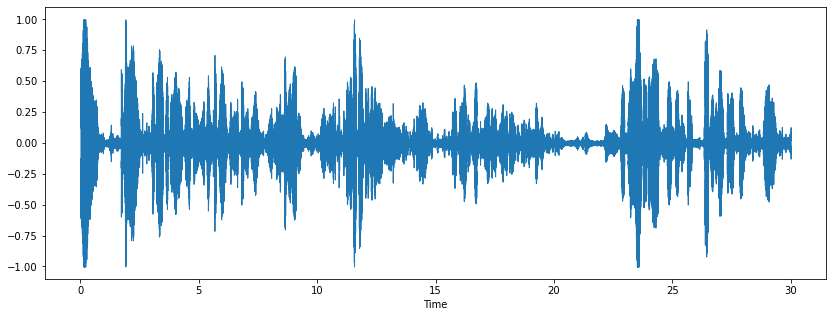

In [51]:
plt.figure(figsize=(14, 5))
#plotting the sampled signal
librosa.display.waveshow(x, sr=sr)

In [52]:
#We can change this behavior by resampling at sr=44.1KHz.
x,sr = librosa.load(audio_data, sr=44000)

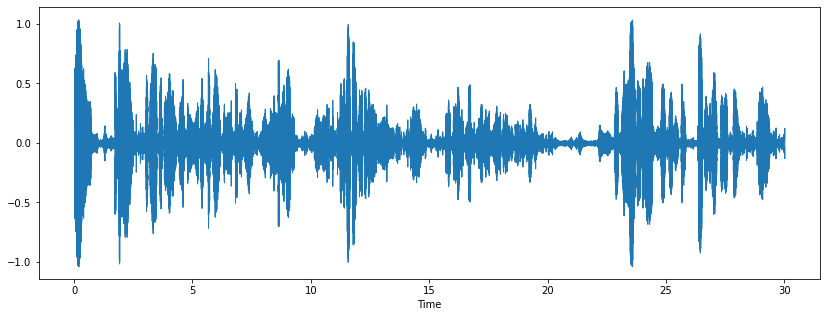

In [53]:
plt.figure(figsize=(14, 5))
#plotting the sampled signal
librosa.display.waveshow(x, sr=sr)

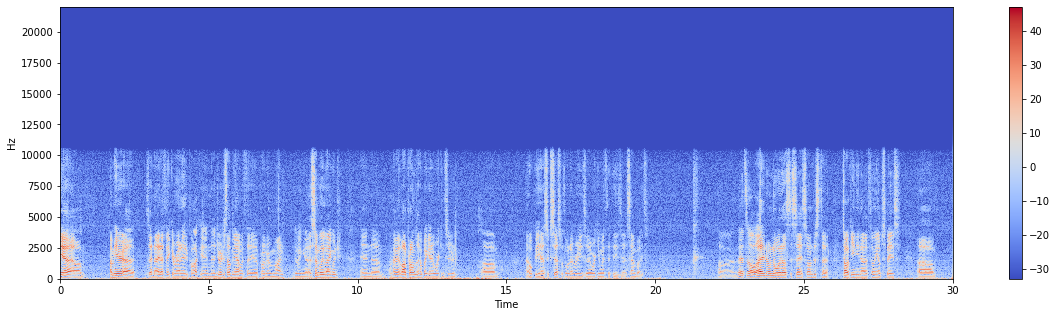

In [54]:
#x: numpy array
X = librosa.stft(x)
#converting into energy levels(dB)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

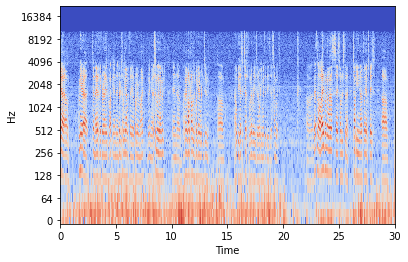

In [55]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')

In [56]:
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz

#playing generated audio
Audio(x, rate=sr) # load a NumPy array

# librosa.output.write_wav('generated.wav', x, sr) # writing wave file in .wav format
sf.write('generated.wav', x, sr)

In [57]:
Audio(x, rate=sr)


In [58]:
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)

In [60]:
from sklearn.preprocessing import minmax_scale


ValueError: x and y must have same first dimension, but have shapes (110250,) and (1, 1292)

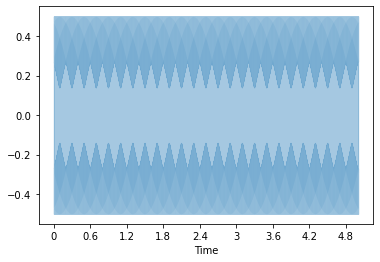

In [61]:
#min = minimum value for each row of the vector signal
#max = maximum value for each row of the vector signal
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

In [62]:
# just starting to understand how to use audio files